# **대구 4조 해커톤**



## 1. 소개
- 팀원: 대구_박민규, 대구_이동섭, 대구_이동현, 대구_이호빈
- Dataset: DACON-전력사용량 예측 AI 경진대회(https://dacon.io/competitions/official/235736/overview/description)

## 2. 라이브러리 Install, Import

In [55]:
#Colab에서 작업하기위한 구글드라이브 마운트
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# pyplot 그래프 한글 깨짐 현상을 방지하기 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [57]:
# 라이브러리 가져오기
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 3. 데이터 전처리

In [58]:
energy = pd.read_csv('/content/drive/MyDrive/energy/train.csv',encoding='euc-kr', parse_dates=['date_time'])
energy.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


Dataset: DACON-전력사용량 예측 AI 경진대회(https://dacon.io/competitions/official/235736/overview/description) - train데이터만 활용
Columns
- num: 건물번호
- date_time: 날짜
- 전력사용량(kWh)
- 기온(°C)
- 풍속(m/s)	
- 습도(%)	
- 강수량(mm)	
- 일조(hr)	
- 비전기냉방설비운영	
- 태양광보유  

num은 60개의 건물번호로 1번부터 60번까지 차례대로 값들이 있고 date_time 컬럼은 2020년 06월 01일 00시 부터 2020년 08월 24일 23시까지 1시간 간격의 데이터 값들이 들어있습니다.
비전기냉방설비운영과 태양광보유 컬럼들은 보유하고 있다면 1 보유하고 있지 않으면 0
나머지 컬럼들은 날짜 데이터 1시간 단위로 측정한 값들을 가집니다

In [59]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


num은 int형, date_time은 datetime형
나머지는 모두 float형

In [60]:
energy.dtypes

num                    int64
date_time     datetime64[ns]
전력사용량(kWh)           float64
기온(°C)               float64
풍속(m/s)              float64
습도(%)                float64
강수량(mm)              float64
일조(hr)               float64
비전기냉방설비운영            float64
태양광보유                float64
dtype: object

In [61]:
energy.rename(columns={'num':'건물번호','date_time':'날짜'}, inplace=True)
energy

,건물번호,날짜,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


num과 date_time 컬럼을 다른 컬럼들과 알아보기 쉽도록 각각 건물번호, 날짜 컬럼명으로 변경해줍니다.

In [62]:
energy.describe()

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


데이터셋의 데이터 요약

In [63]:
energy.isnull().sum()

건물번호          0
날짜            0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

데이터셋에 null값이 없으므로 결측치 처리는 하지않습니다.

## 4. EDA

기존의 Dataset 변수인 enrgy를 새로운 변수인 energy_month_day_hour에 복사한 뒤 진행

In [64]:
energy_month_day_hour = energy.copy()
energy_month_day_hour

,건물번호,날짜,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


energy_month_day_hour변수에 month와 day, hour 컬럼을 추가하고 날짜데이터에서 월, 일, 시간을 추출하여 각각의 컬럼에 저장

In [65]:
energy_month_day_hour['month'] = energy_month_day_hour['날짜'].dt.month
energy_month_day_hour['day'] = energy_month_day_hour['날짜'].dt.day
energy_month_day_hour['hour'] = energy_month_day_hour['날짜'].dt.hour

In [66]:
energy_month_day_hour

,건물번호,날짜,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,8,24,19
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,8,24,20
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,8,24,21
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,8,24,22


### 4.1. 개별 컬럼 시각화


#### 월간 단위
월별(전력사용량(kWh)	기온(°C)	풍속(m/s)	습도(%)	강수량(mm)	일조(hr)) 평균 시각화

In [67]:
mean_month = energy_month_day_hour.groupby('month').mean()
mean_month

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,day,hour
month,,,,,,,,,,,
6,30.5,2216.692239,23.195282,2.106551,73.377949,0.240706,0.296979,0.683333,0.483333,15.5,11.5
7,30.5,2300.404814,23.419205,2.076230,82.531519,0.566176,0.155161,0.683333,0.483333,16.0,11.5
8,30.5,2491.554466,26.647575,2.305408,85.609230,0.791727,0.184624,0.683333,0.483333,12.5,11.5


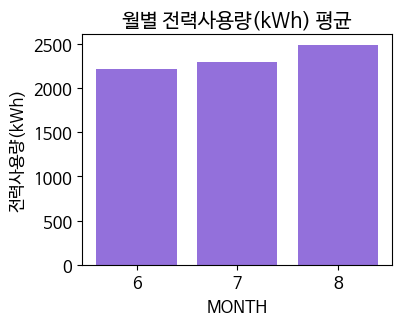

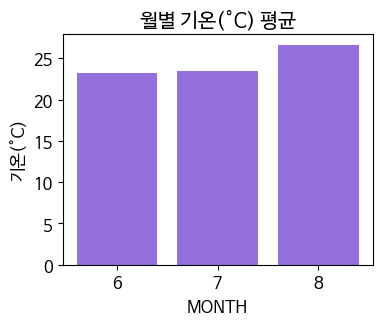

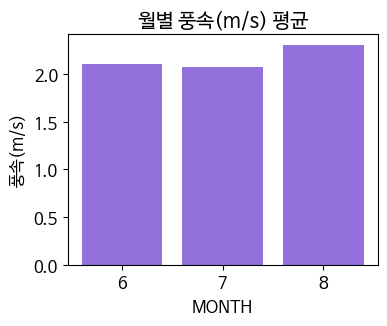

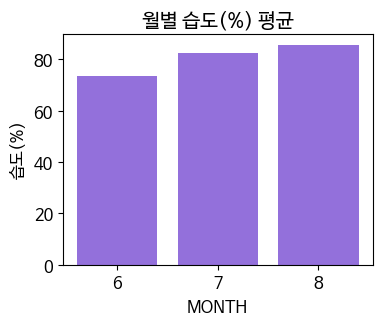

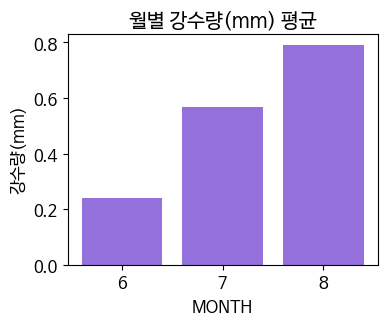

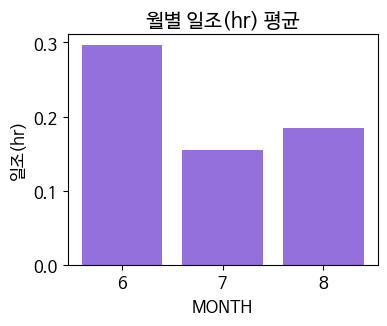

In [68]:
for column in energy_month_day_hour.columns[2:8]:#건물번호, 비전기냉방설비운영, 태양광보유는 제외
  x = np.arange(3)
  plt.bar(x,mean_month[column],color=['mediumpurple'])
  plt.xticks(x, mean_month.index)
  plt.xlabel('MONTH')
  plt.ylabel(column)
  plt.title(f'월별 {column} 평균')
  plt.show()

#### 일간 단위 
일별(전력사용량(kWh)	기온(°C)	풍속(m/s)	습도(%)	강수량(mm)	일조(hr)) 평균 시각화

In [69]:
mean_day = energy_month_day_hour.groupby('day').mean()
mean_day

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,hour
day,,,,,,,,,,,
1,30.5,2180.293377,22.414722,2.300093,79.277778,0.271829,0.224977,0.683333,0.483333,7.0,11.5
2,30.5,2187.918528,22.602639,2.071921,77.217824,0.439282,0.174699,0.683333,0.483333,7.0,11.5
3,30.5,2329.669552,23.601389,2.512407,79.946296,0.772801,0.176759,0.683333,0.483333,7.0,11.5
4,30.5,2281.732663,23.984097,2.353079,81.164815,0.076690,0.226528,0.683333,0.483333,7.0,11.5
5,30.5,2272.064400,24.161852,1.928495,80.717361,0.160810,0.231181,0.683333,0.483333,7.0,11.5
6,30.5,2302.403954,24.141829,2.475208,80.376620,0.861273,0.186644,0.683333,0.483333,7.0,11.5
7,30.5,2274.739422,23.539097,1.982963,80.249074,0.483218,0.200880,0.683333,0.483333,7.0,11.5
8,30.5,2291.437008,24.317431,1.995856,77.925231,0.841944,0.310903,0.683333,0.483333,7.0,11.5
9,30.5,2338.257989,25.597153,2.324005,74.406250,0.738403,0.298935,0.683333,0.483333,7.0,11.5


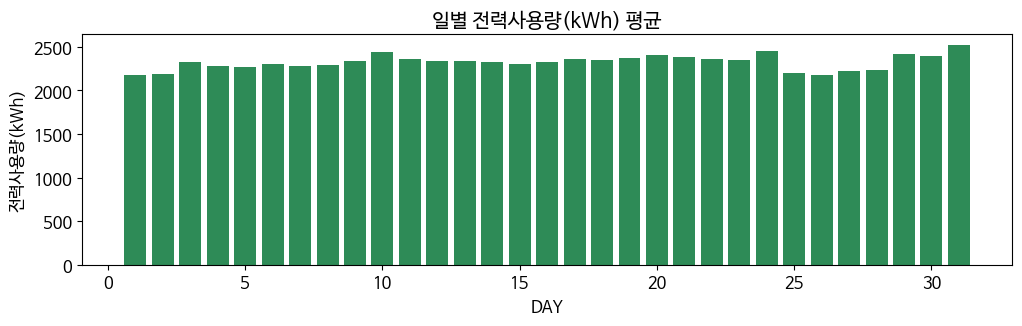

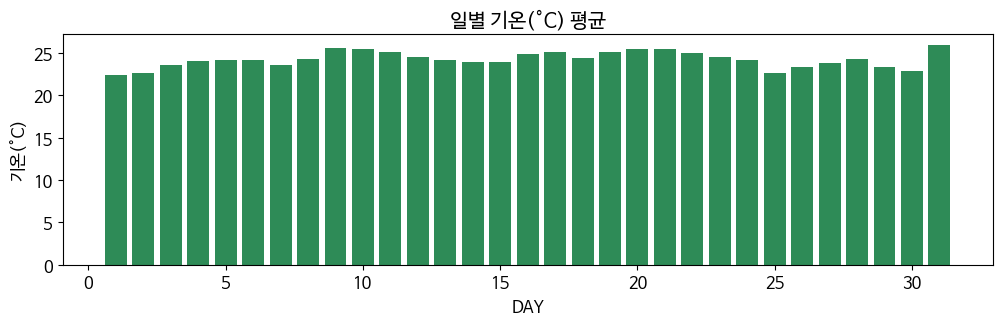

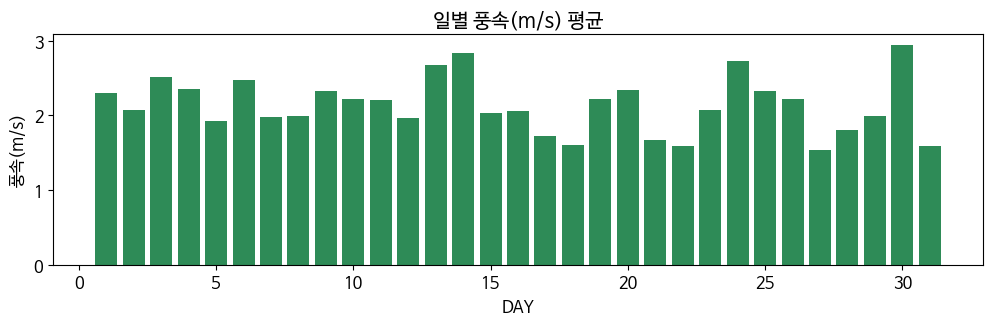

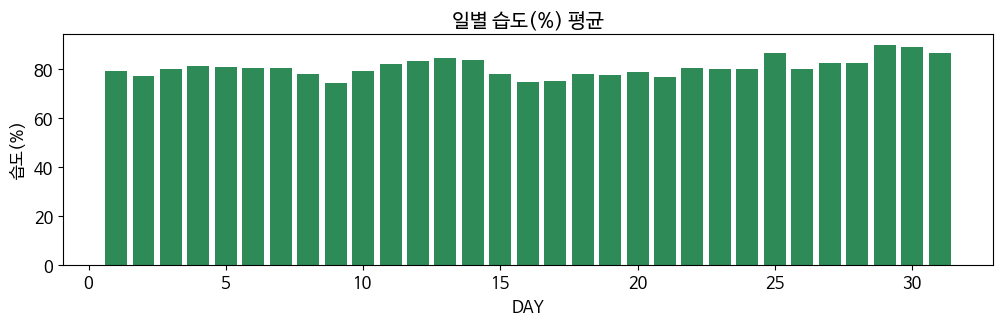

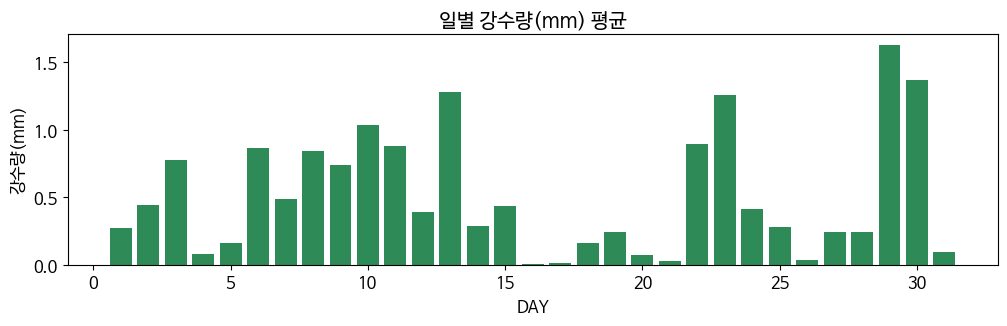

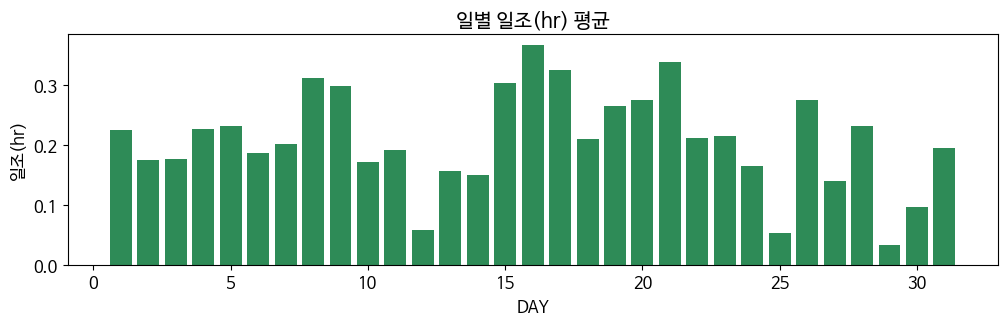

In [70]:
for column in energy_month_day_hour.columns[2:8]:
  plt.figure(figsize=(12, 3))
  plt.bar(mean_day.index,mean_day[column],color=['seagreen'])
  plt.xlabel('DAY')
  plt.ylabel(column)
  plt.title(f'일별 {column} 평균')
  plt.show()

#### 시간 단위
시간별(전력사용량(kWh)	기온(°C)	풍속(m/s)	습도(%)	강수량(mm)	일조(hr)) 평균 시각화

In [71]:
mean_hour = energy_month_day_hour.groupby('hour').mean()
mean_hour

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day
hour,,,,,,,,,,,
0,30.5,1846.469340,22.759392,1.761157,86.039961,0.472392,0.000000,0.683333,0.483333,6.929412,14.835294
1,30.5,1797.227145,22.540529,1.750608,86.842255,0.433784,0.000000,0.683333,0.483333,6.929412,14.835294
2,30.5,1763.945449,22.351784,1.715157,87.642569,0.428098,0.000000,0.683333,0.483333,6.929412,14.835294
3,30.5,1731.496235,22.153294,1.709902,88.470980,0.581314,0.000000,0.683333,0.483333,6.929412,14.835294
4,30.5,1723.405929,21.987333,1.695922,89.047980,0.511137,0.000000,0.683333,0.483333,6.929412,14.835294
5,30.5,1774.481706,21.841725,1.653941,89.520490,0.835294,0.000000,0.683333,0.483333,6.929412,14.835294
6,30.5,1892.440397,21.820529,1.615373,89.731039,0.736471,0.005373,0.683333,0.483333,6.929412,14.835294
7,30.5,2111.672173,22.285706,1.725510,88.331529,0.724412,0.147353,0.683333,0.483333,6.929412,14.835294
8,30.5,2376.449926,23.125078,1.859059,84.958824,0.703667,0.290118,0.683333,0.483333,6.929412,14.835294


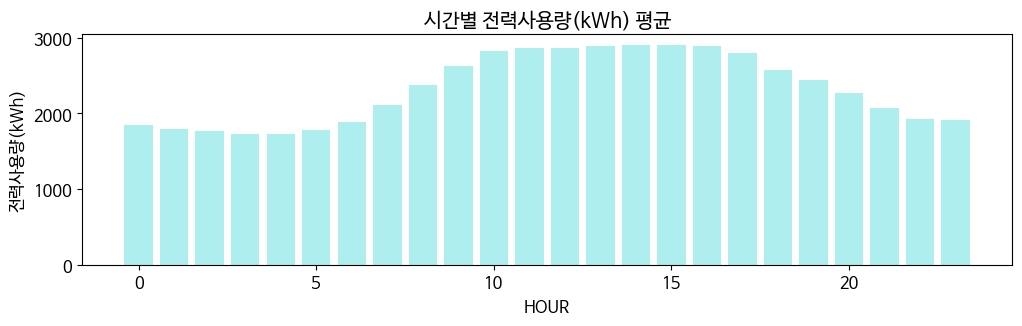

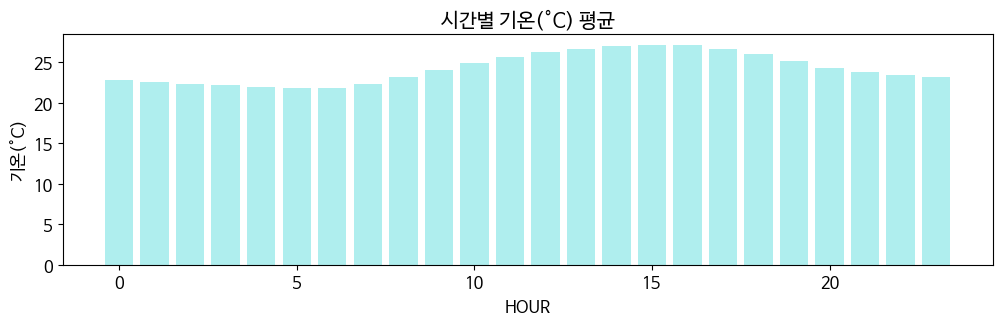

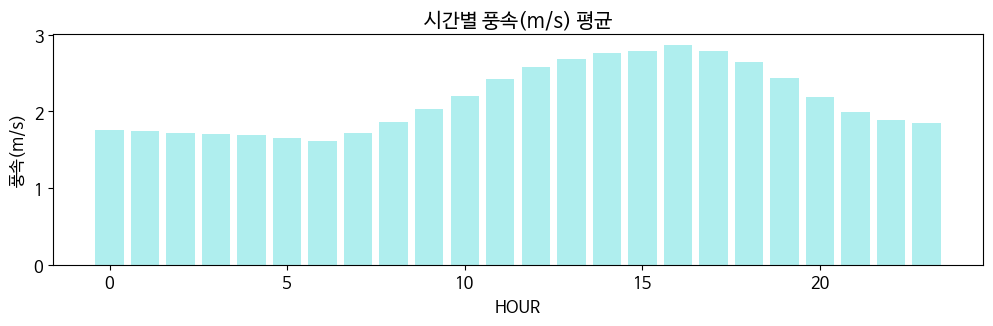

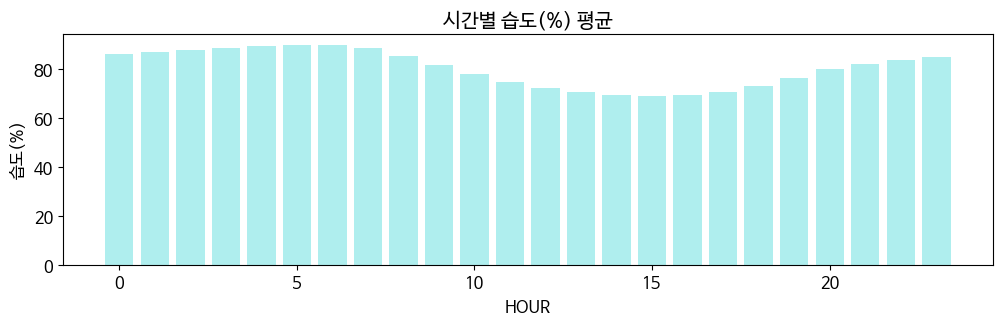

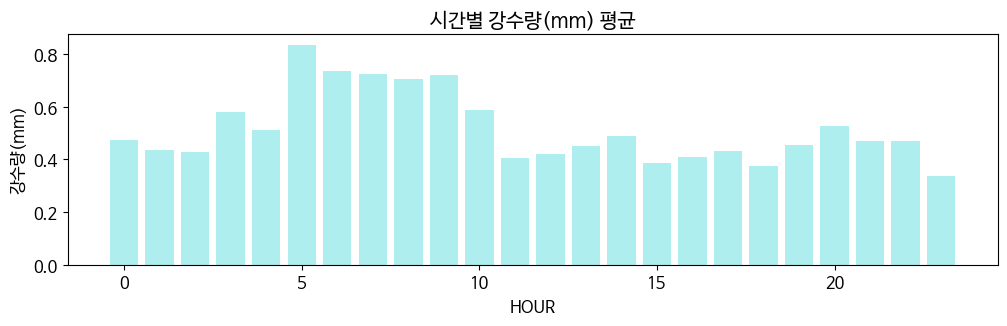

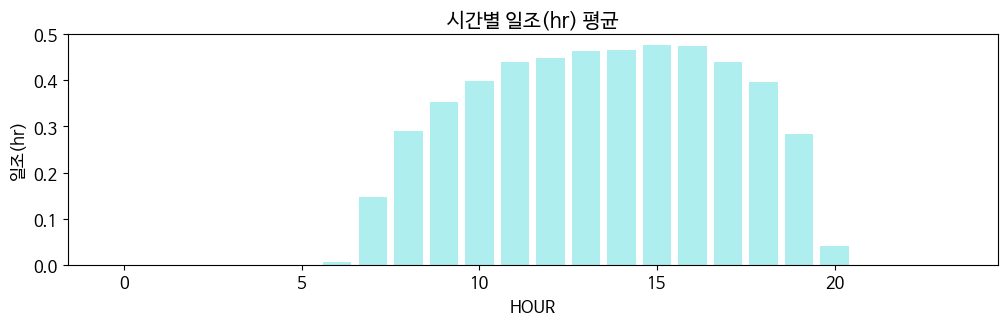

In [72]:
for column in energy_month_day_hour.columns[2:8]:
  plt.figure(figsize=(12, 3))
  plt.bar(mean_hour.index,mean_hour[column],color=['paleturquoise'])
  plt.xlabel('HOUR')
  plt.ylabel(column)
  plt.title(f'시간별 {column} 평균')
  plt.show()

### 4.2. 상관성 확인

상관관계 정도는 아래의 사진으로 분석한다.

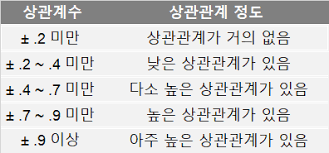

#### 컬럼 간의 상관관계

In [73]:
energy_corr = energy.corr()
energy_corr = energy_corr.apply(lambda x: round(x ,2))
energy_corr

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
건물번호,1.00,-0.06,0.00,-0.05,0.01,-0.00,-0.01,0.06,0.10
전력사용량(kWh),-0.06,1.00,0.16,0.11,-0.08,-0.01,0.11,0.15,0.12
기온(°C),0.00,0.16,1.00,0.17,-0.51,-0.09,0.52,0.02,0.03
풍속(m/s),-0.05,0.11,0.17,1.00,-0.11,0.08,0.16,0.01,-0.08
습도(%),0.01,-0.08,-0.51,-0.11,1.00,0.21,-0.63,-0.03,-0.02
강수량(mm),-0.00,-0.01,-0.09,0.08,0.21,1.00,-0.11,-0.00,-0.02
일조(hr),-0.01,0.11,0.52,0.16,-0.63,-0.11,1.00,-0.01,-0.01
비전기냉방설비운영,0.06,0.15,0.02,0.01,-0.03,-0.00,-0.01,1.00,0.08
태양광보유,0.10,0.12,0.03,-0.08,-0.02,-0.02,-0.01,0.08,1.00


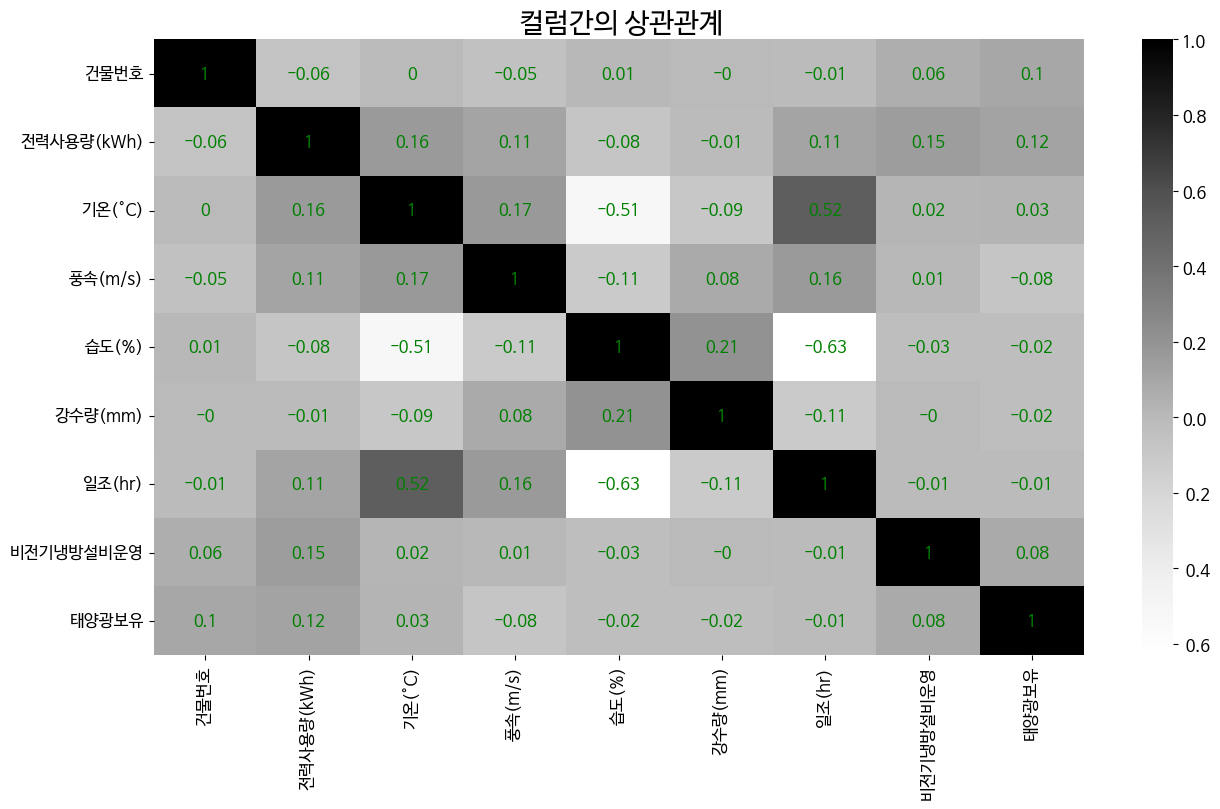

In [74]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(energy_corr, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.title('컬럼간의 상관관계', fontsize=20)
plt.show()

- 우리가 원하는 전력사용량과 다른 컬럼들의 상관관계는 거의 관계가 없다는 것으로 판단된다. 하지만 이 상관관계는 모든 전체 데이터에 대한 것이므로 특정 건물 데이터를 가지고 다시 상관관계를 시각화하는 것으로 판단   
- 기온, 풍속, 습도는 전력사용량과 상관관계가 높다고 추정

#### 임의의 개별 표본에 대한 상관관계 확인
1, 30, 60번 건물의 임의로 선정하여 상관관계를 재확인 해보았습니다.

- 1번 건물과 컬럼의 상관관계

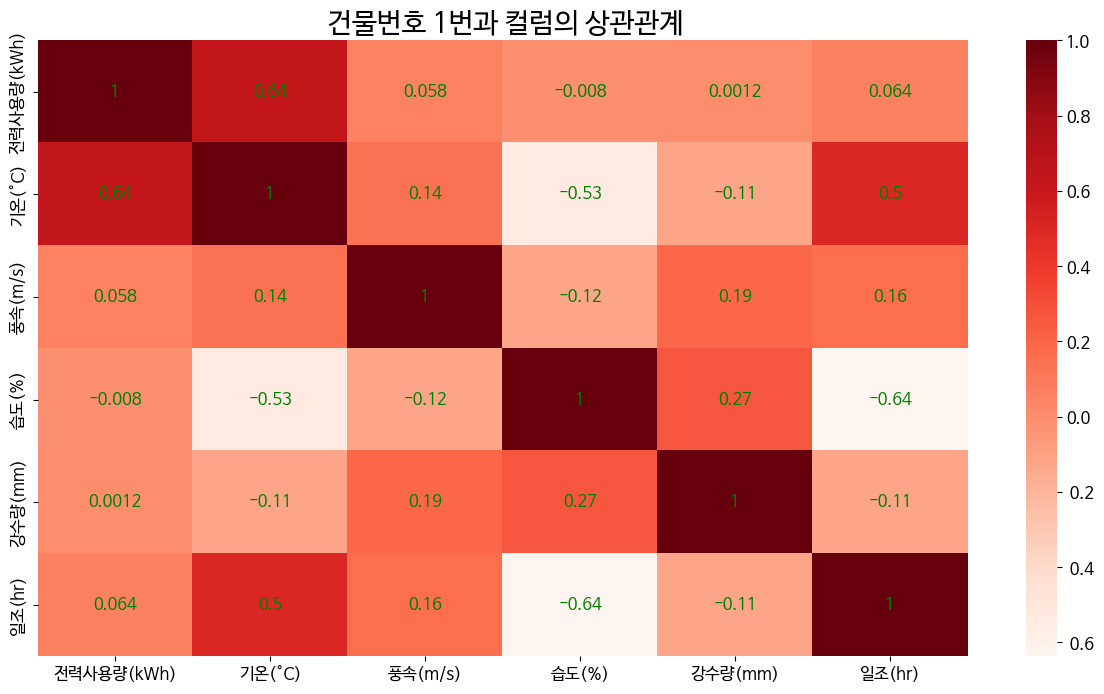

In [75]:
plt.figure(figsize = (15,8))
energy_num1_corr = energy[energy["건물번호"]==1].drop(["건물번호","비전기냉방설비운영","태양광보유"],axis=1)
energy_num1_corr = energy_num1_corr.corr()
ax = sns.heatmap(energy_num1_corr, annot=True, annot_kws=dict(color='g'), cmap='Reds')
plt.title('건물번호 1번과 컬럼의 상관관계', fontsize=20)
plt.show()

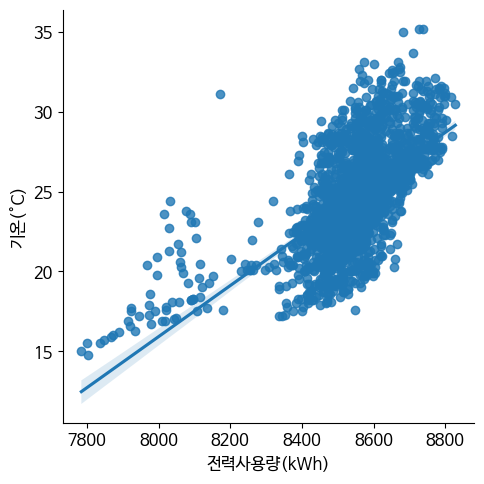

In [76]:
ax = sns.lmplot(x="전력사용량(kWh)",y='기온(°C)', data = energy[energy["건물번호"]==1])

- 1번 건물의 경우 전력사용량과 기온 컬람간의 다소 높은 상관관계가 있는 것을 알 수 있었고, 다른 컬럼들은 상관관계가 거의 없엇다.

- 30번 건물과 컬럼의 상관관계

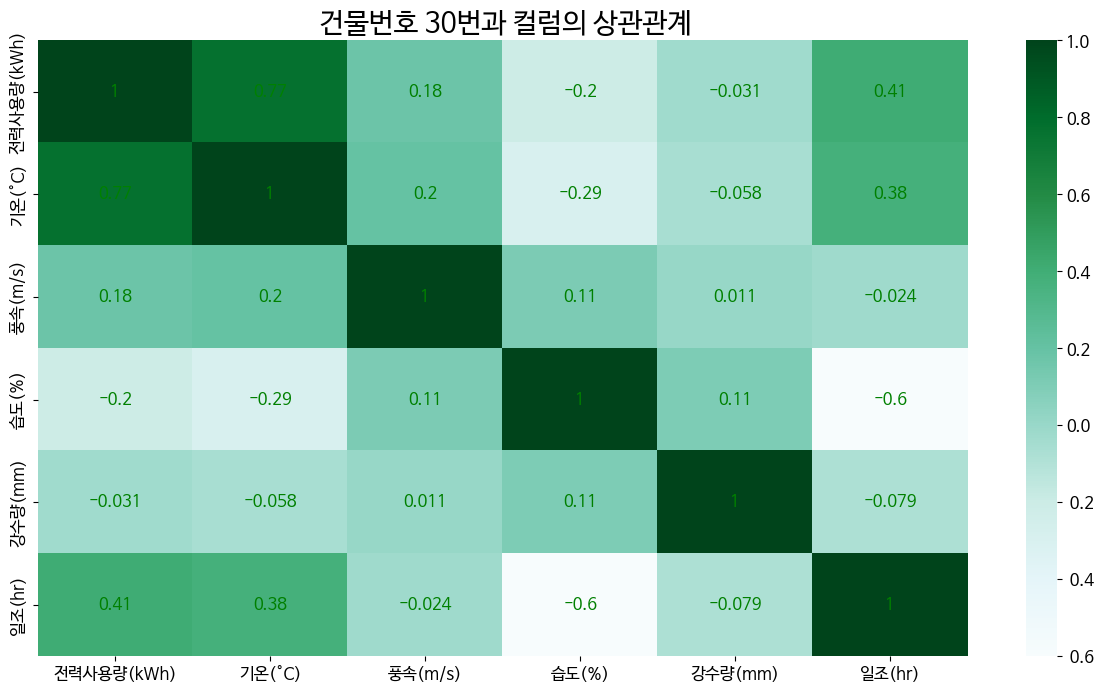

In [77]:
plt.figure(figsize = (15,8))
energy_num30_corr = energy[energy["건물번호"]==30].drop(["건물번호","비전기냉방설비운영","태양광보유"],axis=1)
energy_num30_corr = energy_num30_corr.corr()
ax = sns.heatmap(energy_num30_corr, annot=True, annot_kws=dict(color='g'), cmap='BuGn')
plt.title('건물번호 30번과 컬럼의 상관관계', fontsize=20)
plt.show()

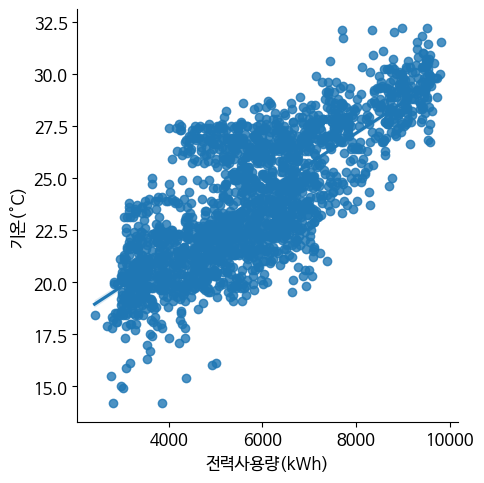

In [78]:
ax = sns.lmplot(x="전력사용량(kWh)",y='기온(°C)', data = energy[energy["건물번호"]==30])

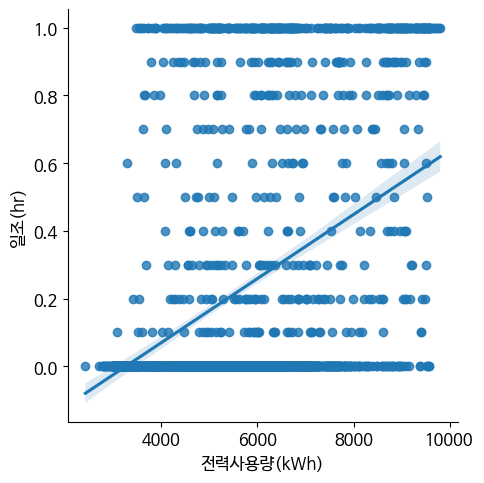

In [79]:
ax = sns.lmplot(x="전력사용량(kWh)",y='일조(hr)', data = energy[energy["건물번호"]==30])

- 30번 건물의 경우 일조는 0.41로서 다소 높은 상관관계를 가지지고 기온은 0.77로 일조보다 높은 상관관계를 가지고 있다.

- 60번 건물과 컬럼의 상관관계

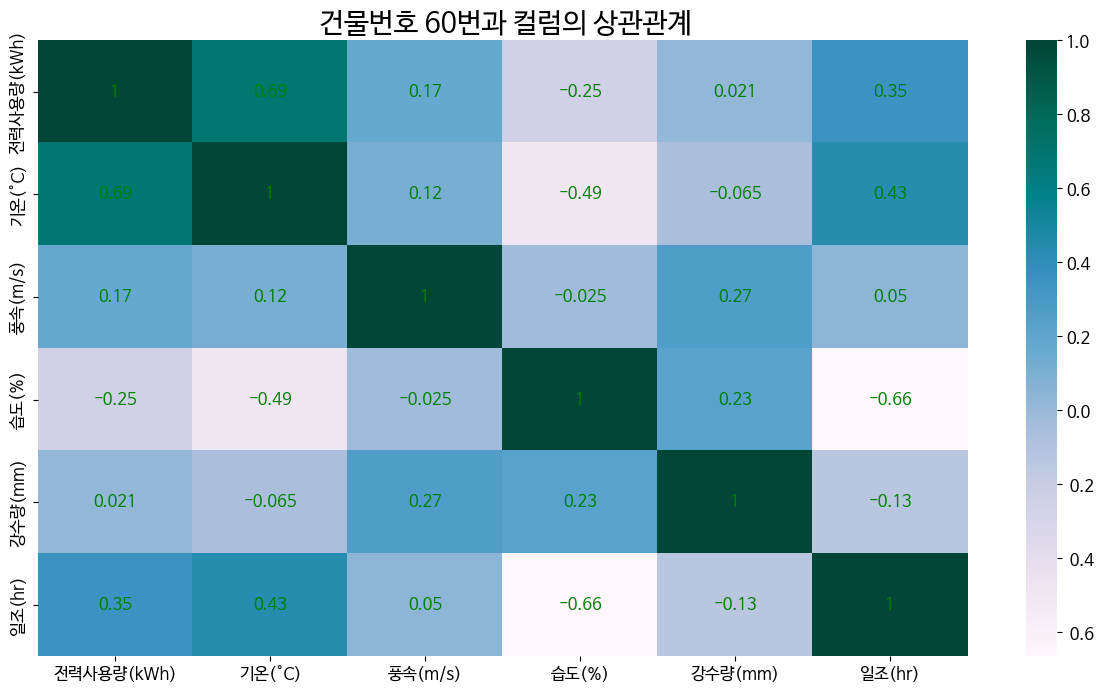

In [80]:
plt.figure(figsize = (15,8))
energy_num60_corr = energy[energy["건물번호"]==60].drop(["건물번호","비전기냉방설비운영","태양광보유"],axis=1)
energy_num60_corr = energy_num60_corr.corr()
ax = sns.heatmap(energy_num60_corr, annot=True, annot_kws=dict(color='g'), cmap='PuBuGn')
plt.title('건물번호 60번과 컬럼의 상관관계', fontsize=20)
plt.show()

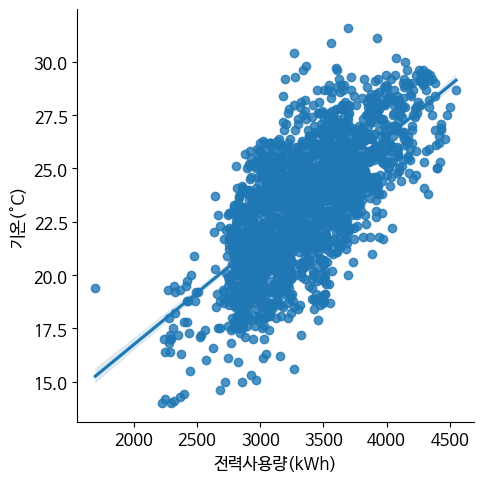

In [81]:
ax = sns.lmplot(x="전력사용량(kWh)",y='기온(°C)', data = energy[energy["건물번호"]==60])

- 60번 건물은 기온 컬럼만이 다소 높은 상관관계를 가지고 일조의 경우 낮은 상관관계를 가진다.

### 4.3. 태양열 설비 컬럼 활용

#### 태양광 보유 건물만 분류

In [82]:
y_solar = energy['태양광보유'] == 1.0
energy_solra_y = energy[y_solar]
energy_solra_y

,건물번호,날짜,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
4080,3,2020-06-01 00:00:00,3183.624,17.0,2.0,100.0,1.1,0.0,1.0,1.0
4081,3,2020-06-01 01:00:00,3171.636,17.2,2.3,99.0,0.1,0.0,1.0,1.0
4082,3,2020-06-01 02:00:00,3175.740,17.2,3.7,98.0,0.0,0.0,1.0,1.0
4083,3,2020-06-01 03:00:00,3194.856,16.7,3.1,99.0,0.0,0.0,1.0,1.0
4084,3,2020-06-01 04:00:00,3198.528,16.9,3.5,98.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


#### 태양광 미보유 건물만 분류

In [83]:
n_solar = energy['태양광보유'] == 0.0
energy_solra_n = energy[n_solar]
energy_solra_n

,건물번호,날짜,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
120355,59,2020-08-24 19:00:00,1186.164,27.2,0.1,82.0,0.0,0.0,1.0,0.0
120356,59,2020-08-24 20:00:00,929.232,25.4,2.2,88.0,0.0,0.0,1.0,0.0
120357,59,2020-08-24 21:00:00,1003.104,25.0,1.5,90.0,0.0,0.0,1.0,0.0
120358,59,2020-08-24 22:00:00,1110.672,24.3,0.2,94.0,0.0,0.0,1.0,0.0


#### 태양광 보유 건물만 분류된 데이터에서 시간대로 나누어진 자료를 건물번호로 묶어 평균 낸 데이터

In [84]:
solar_y_groups = energy_solra_y.groupby('건물번호')
solar_y = solar_y_groups.mean().reset_index()
solar_y

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,3,3371.353699,24.241275,1.937402,82.667157,0.540882,0.219657,1.0,1.0
1,4,763.997353,25.143627,2.056324,71.136275,0.393186,0.235931,1.0,1.0
2,8,8837.364073,24.124363,1.305735,79.162255,0.488922,0.199167,1.0,1.0
3,9,1256.884880,24.243284,0.991127,82.871078,0.556618,0.204902,0.0,1.0
4,12,1748.853338,23.323186,2.781814,80.238824,0.395833,0.246765,1.0,1.0
5,14,1770.616219,25.106275,2.797941,80.475490,0.208284,0.233333,1.0,1.0
6,16,1660.828447,24.298971,1.594069,81.661716,0.465294,0.230098,1.0,1.0
7,21,1662.093794,24.608578,2.345980,75.971569,0.493873,0.184608,0.0,1.0
8,23,1884.175209,24.801716,1.368480,83.366176,0.512353,0.213725,0.0,1.0
9,24,3114.640165,24.241275,1.937402,82.667157,0.540882,0.219657,1.0,1.0


#### 태양광 미보유 건물만 분류된 데이터에서 시간대로 나누어진 자료를 건물번호로 묶어 평균 낸 데이터

In [85]:
solar_n_groups = energy_solra_n.groupby('건물번호')
solar_n = solar_n_groups.mean().reset_index()
solar_n

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,8543.273488,24.608578,2.345980,75.971569,0.493873,0.184608,0.0,0.0
1,2,1299.914365,23.623333,3.197990,81.113725,0.720098,0.238725,1.0,0.0
2,5,2714.509694,23.623333,3.197990,81.113725,0.720098,0.238725,1.0,0.0
3,6,1184.129868,24.241275,1.937402,82.667157,0.540882,0.219657,0.0,0.0
4,7,1527.138356,24.608578,2.345980,75.971569,0.493873,0.184608,1.0,0.0
5,10,1427.164069,23.623333,3.197990,81.113725,0.720098,0.238725,1.0,0.0
6,11,2391.372635,23.623333,3.197990,81.113725,0.720098,0.238725,0.0,0.0
7,13,1089.115200,24.309657,1.264265,77.677941,0.519167,0.206569,1.0,0.0
8,15,2198.973266,24.241275,1.937402,82.667157,0.540882,0.219657,1.0,0.0
9,17,1019.795029,24.608578,2.345980,75.971569,0.493873,0.184608,1.0,0.0


#### 태양광 유무에 따른 건물들의 전력소비량 차이 시각화

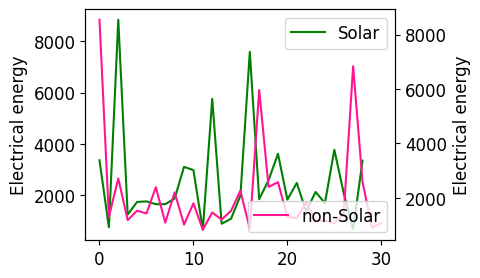

In [86]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

y1 = solar_y['전력사용량(kWh)']
y2 = solar_n['전력사용량(kWh)']

fig, ax1 = plt.subplots()
ax1.plot(y1, color='green', label='Solar')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(y2, color='deeppink', label='non-Solar')
ax2.legend(loc='lower right')

ax1.set_ylabel('Electrical energy')
ax2.set_ylabel('Electrical energy')

plt.show()

태양광 유무에 따른 전력소비량 차이를 알아보고 싶어, 태양광보유 건물과 태양광을 보유하지 않은 건물을 나누어서 전력소비량을 시각화해보았다. 

태양광을 보유한 건물의 전력소비량이 더 많은 것으로 확인되었다.
(태양광 설비를 보유한 건물의 전력소모량 평균이 500kWH 높았다)

현 데이터로는 태양광이 시설이 있는 건물이 더 규모가 큰 건물일 가능성이 커서 평균적인 전력소비량 자체가 많았던 것으로 예측만 해 볼 수 있을 것 같고

태양광만 있고 없는 조건만 변화가 있고 같은 건물인 데이터가 없어서 정확한 비교가 불가능했던 것 같다.

### 4.4. 건물별 데이터 평균

#### 전력소비량

In [87]:
energy2_groups = energy.groupby('건물번호')
energy2 = energy2_groups.mean().reset_index()
energy2

,건물번호,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,8543.273488,24.608578,2.345980,75.971569,0.493873,0.184608,0.0,0.0
1,2,1299.914365,23.623333,3.197990,81.113725,0.720098,0.238725,1.0,0.0
2,3,3371.353699,24.241275,1.937402,82.667157,0.540882,0.219657,1.0,1.0
3,4,763.997353,25.143627,2.056324,71.136275,0.393186,0.235931,1.0,1.0
4,5,2714.509694,23.623333,3.197990,81.113725,0.720098,0.238725,1.0,0.0
5,6,1184.129868,24.241275,1.937402,82.667157,0.540882,0.219657,0.0,0.0
6,7,1527.138356,24.608578,2.345980,75.971569,0.493873,0.184608,1.0,0.0
7,8,8837.364073,24.124363,1.305735,79.162255,0.488922,0.199167,1.0,1.0
8,9,1256.884880,24.243284,0.991127,82.871078,0.556618,0.204902,0.0,1.0
9,10,1427.164069,23.623333,3.197990,81.113725,0.720098,0.238725,1.0,0.0


#### 막대 그래프를 통해 모든 건물에 대한 전력소비량 시각화

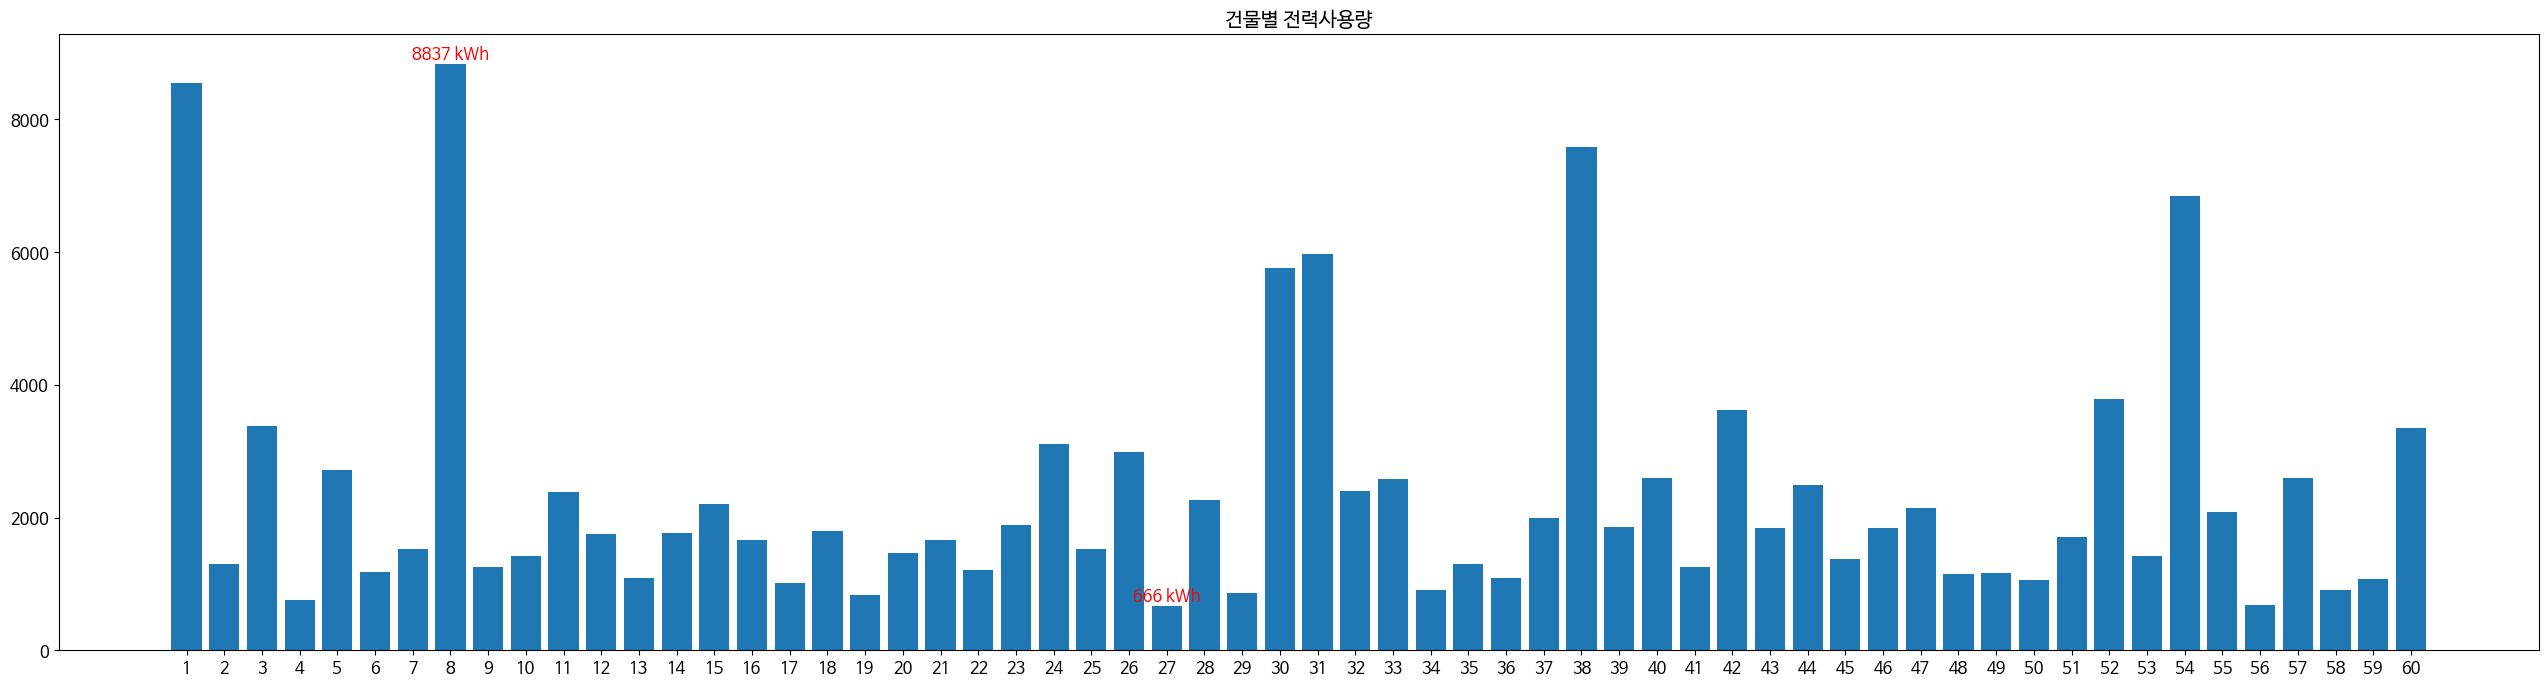

In [102]:
plt.figure(figsize=(32,8))

x = np.arange(60)
b_num = list(range(1, 61))
y = energy2['전력사용량(kWh)']

plt.title("건물별 전력사용량")

dic = { y:x for x, y in zip(x, y) }

plt.bar(x,y)
plt.xticks(x, b_num)
plt.text(dic[min(y)],min(y),
         str(int(min(y))) + ' kWh',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')

plt.text(dic[max(y)],max(y),
         str(int(max(y))) + ' kWh',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')

plt.show()

#### 최소, 최대 전력소비량만 시각화

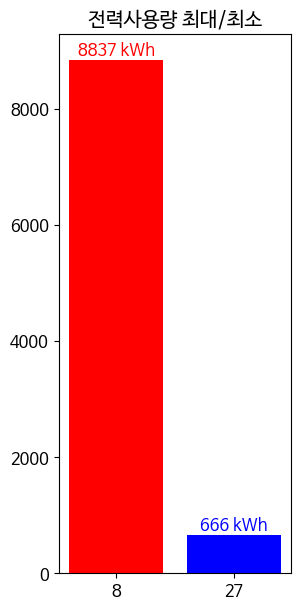

In [103]:
plt.figure(figsize=(3,7))

x = np.arange(2)
b_num = [8, 27]
y = [8837, 666]


plt.title("전력사용량 최대/최소")

dic = { y:x for x, y in zip(x, y) }

plt.bar(x,y, color=['r','b'])
plt.xticks(x, b_num)
plt.text(dic[min(y)],min(y),
         str(int(min(y))) + ' kWh',
         color='b',
         horizontalalignment='center',
         verticalalignment='bottom')

plt.text(dic[max(y)],max(y),
         str(int(max(y))) + ' kWh',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')

plt.show()

### 4.5. 군집화

#### (1) 라이브러리 및 모듈 추가

In [90]:
!pip install tslearn

In [91]:
!pip install minisom

In [92]:
# 군집화를 위한 모듈들
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

#### (2) 데이터 리로드

In [93]:
energy = pd.read_csv('/content/drive/MyDrive/energy/train.csv', encoding='euc-kr', parse_dates=['date_time'])
energy.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


#### (3) 날짜정보 추가
: 요일 및 주간 단위의 데이터 군집화를 위한 과정입니다.

In [94]:
#요일
def weekday(x):
    if x.dayofweek == 6:
        return '일'
    elif x.dayofweek == 0:
        return '월'
    elif x.dayofweek == 1:
        return '화'
    elif x.dayofweek == 2:
        return '수'
    elif x.dayofweek == 3:
        return '목'
    elif x.dayofweek == 4:
        return '금'
    else:
        return '토'

# 주말 여부
def weekend(x):
    if x.dayofweek in [5, 6]:
        return 1
    else: 
        return 0

In [95]:
energy['month'] = energy['date_time'].dt.month
energy['day'] = energy['date_time'].dt.day
energy['hour'] = energy['date_time'].dt.hour
energy['weekday'] = energy['date_time'].apply(weekday)
energy['weekend'] = energy['date_time'].apply(weekend)

In [96]:
energy_ = energy.copy()

#### (4) 함수 생성

In [97]:
## 시계열 군집화용 DataFrame을 생성하는 함수 (row->num, col->date_time)
def cluster_df(scaler=MinMaxScaler()):# scaler=[False, 'MinMaxScaler()', 'StandardScaler()']
    energy_ = energy.copy()
    energy_ts = energy_.pivot_table(values='전력사용량(kWh)', index=energy_.num, columns='date_time', aggfunc='first')
    
    if scaler:
        energy_ts_T = scaler.fit_transform(energy_ts.T)
        energy_ts = pd.DataFrame(energy_ts_T.T, index=energy_ts.index, columns=energy_ts.columns)
    
    return energy_ts

In [98]:
def visualize_n_cluster(energy_ts, n_lists=[3,4,5,6], metric='dtw', seed=2021, vis=True):

    if vis:
        fig = plt.figure(figsize = (20 ,5))
        plt.title("군집 개수별 건물수 분포", fontsize=15, y=1.2)
        plt.axis('off')
    
    for idx, n in enumerate(n_lists):
        ts_kmeans = TimeSeriesKMeans(n_clusters=n, metric=metric, random_state=seed)
        energy_ts['cluster(n={})'.format(n)] = ts_kmeans.fit_predict(energy_ts)
        score = round(silhouette_score(energy_ts, energy_ts['cluster(n={})'.format(n)], metric='euclidean'),3)
        
        vc = energy_ts['cluster(n={})'.format(n)].value_counts()
        
        if vis:
            ax = fig.add_subplot(1,len(n_lists), idx+1)
            sns.barplot(x=vc.index, y=vc, palette='Pastel1')
            ax.set(title='n_cluster={0}\nscore: {1}'.format(n,score))
    if vis: 
        plt.tight_layout()
        plt.show()
    
    return energy_ts

In [99]:
## 클러스터 별 시간&요일별 전력사용량 평균 시각화
def visualize_by_cluster(df_with_labels, n_cluster, algorithm):
    fig = plt.figure(figsize = (20 ,4*n_cluster))
    plt.title('군집 수가 {}개일 때 각 군집별 시계열분포'.format(n_cluster), fontsize=15, y=1.05)
    plt.rc('font', family='NanumBarunGothic')
    plt.axis('off')
    
    if algorithm=='kmeans':
        labels = df_with_labels['cluster(n={})'.format(n_cluster)]
        
    idx=1

    for label in set(labels): # 각 군집에 대해
        
        if algorithm=='kmeans':
            df = energy[energy.num.isin(list(labels[labels==label].keys()))]
        
        hour = df.hour.unique()
        weekday = df.weekday.unique()
        
        ### x축: 시간 ###
        ax = fig.add_subplot(n_cluster,2, idx); idx+=1
        ax.set(title='{}번 군집의 시간별 평균 전력사용량'.format(label))
        ax.set_xticks(hour)
        for num in df.num.unique():
            df_one = df[df.num==num]            
            sns.lineplot(x=hour, y=df_one.groupby('hour')['전력사용량(kWh)'].mean(), color='grey', alpha=0.3)
        sns.lineplot(x=hour, y=df.groupby('hour')['전력사용량(kWh)'].mean(), color='red')
        
        ### x축: 요일 ###
        ax = fig.add_subplot(n_cluster,2, idx); idx+=1
        ax.set(title='{}번 군집의 요일별 평균 전력사용량'.format(label))
        for num in df.num.unique():
            df_one = df[df.num==num]
            df_one_counts = df_one.groupby('weekday')['전력사용량(kWh)'].mean()
            df_one_counts = df_one_counts.reindex(weekday)
            sns.lineplot(x=weekday, y=df_one_counts, color='grey', alpha=0.3)
        df_counts = df.groupby('weekday')['전력사용량(kWh)'].mean()
        df_counts = df_counts.reindex(weekday)
        sns.pointplot(x=weekday, y=df_counts, color='red')
        ax.legend(['총 {}개 건물'.format(df.num.nunique())], loc=1)

    plt.show()

#### (5) 군집 갯수별 kmeans 테스트 및 시각화

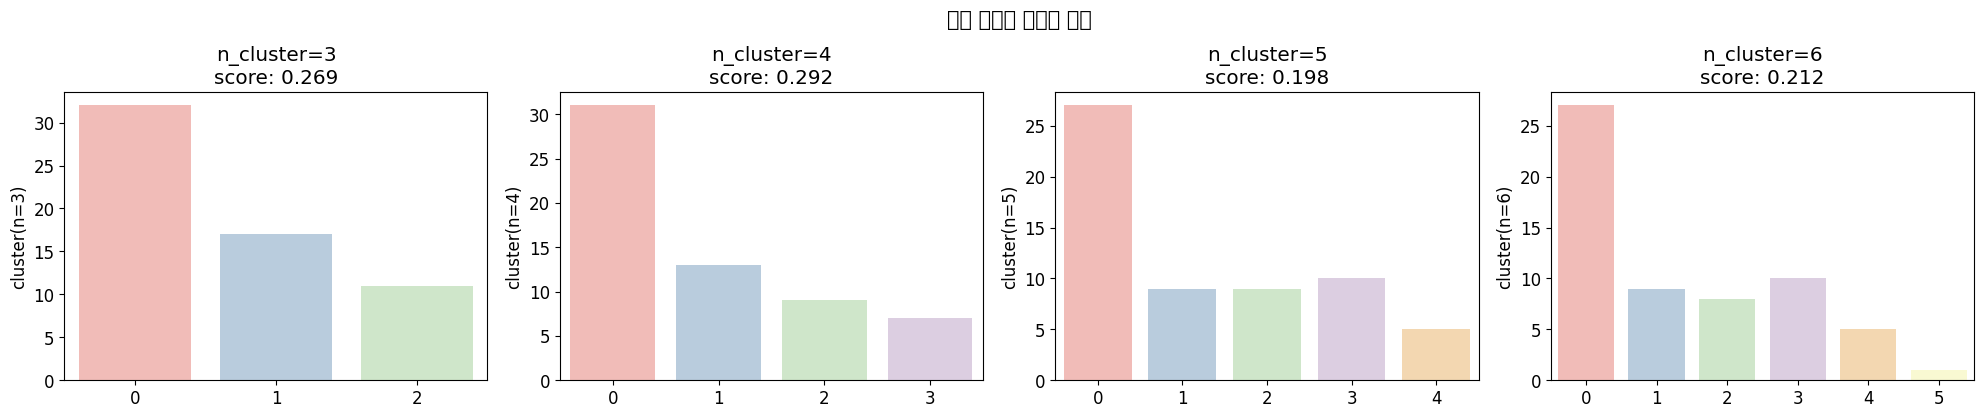

In [100]:
energy_ts = cluster_df(scaler=StandardScaler())
energy_ts = visualize_n_cluster(energy_ts, n_lists=[3,4,5,6], metric='euclidean', seed=2021, vis=True)

#### (6) 군집화
: 앞서 테스트에서 4개의 군집을 형성한 경우 가장 높은 스코어를 기록했고, 분포의 불균형이 적었기 때문에 채택하였습니다.

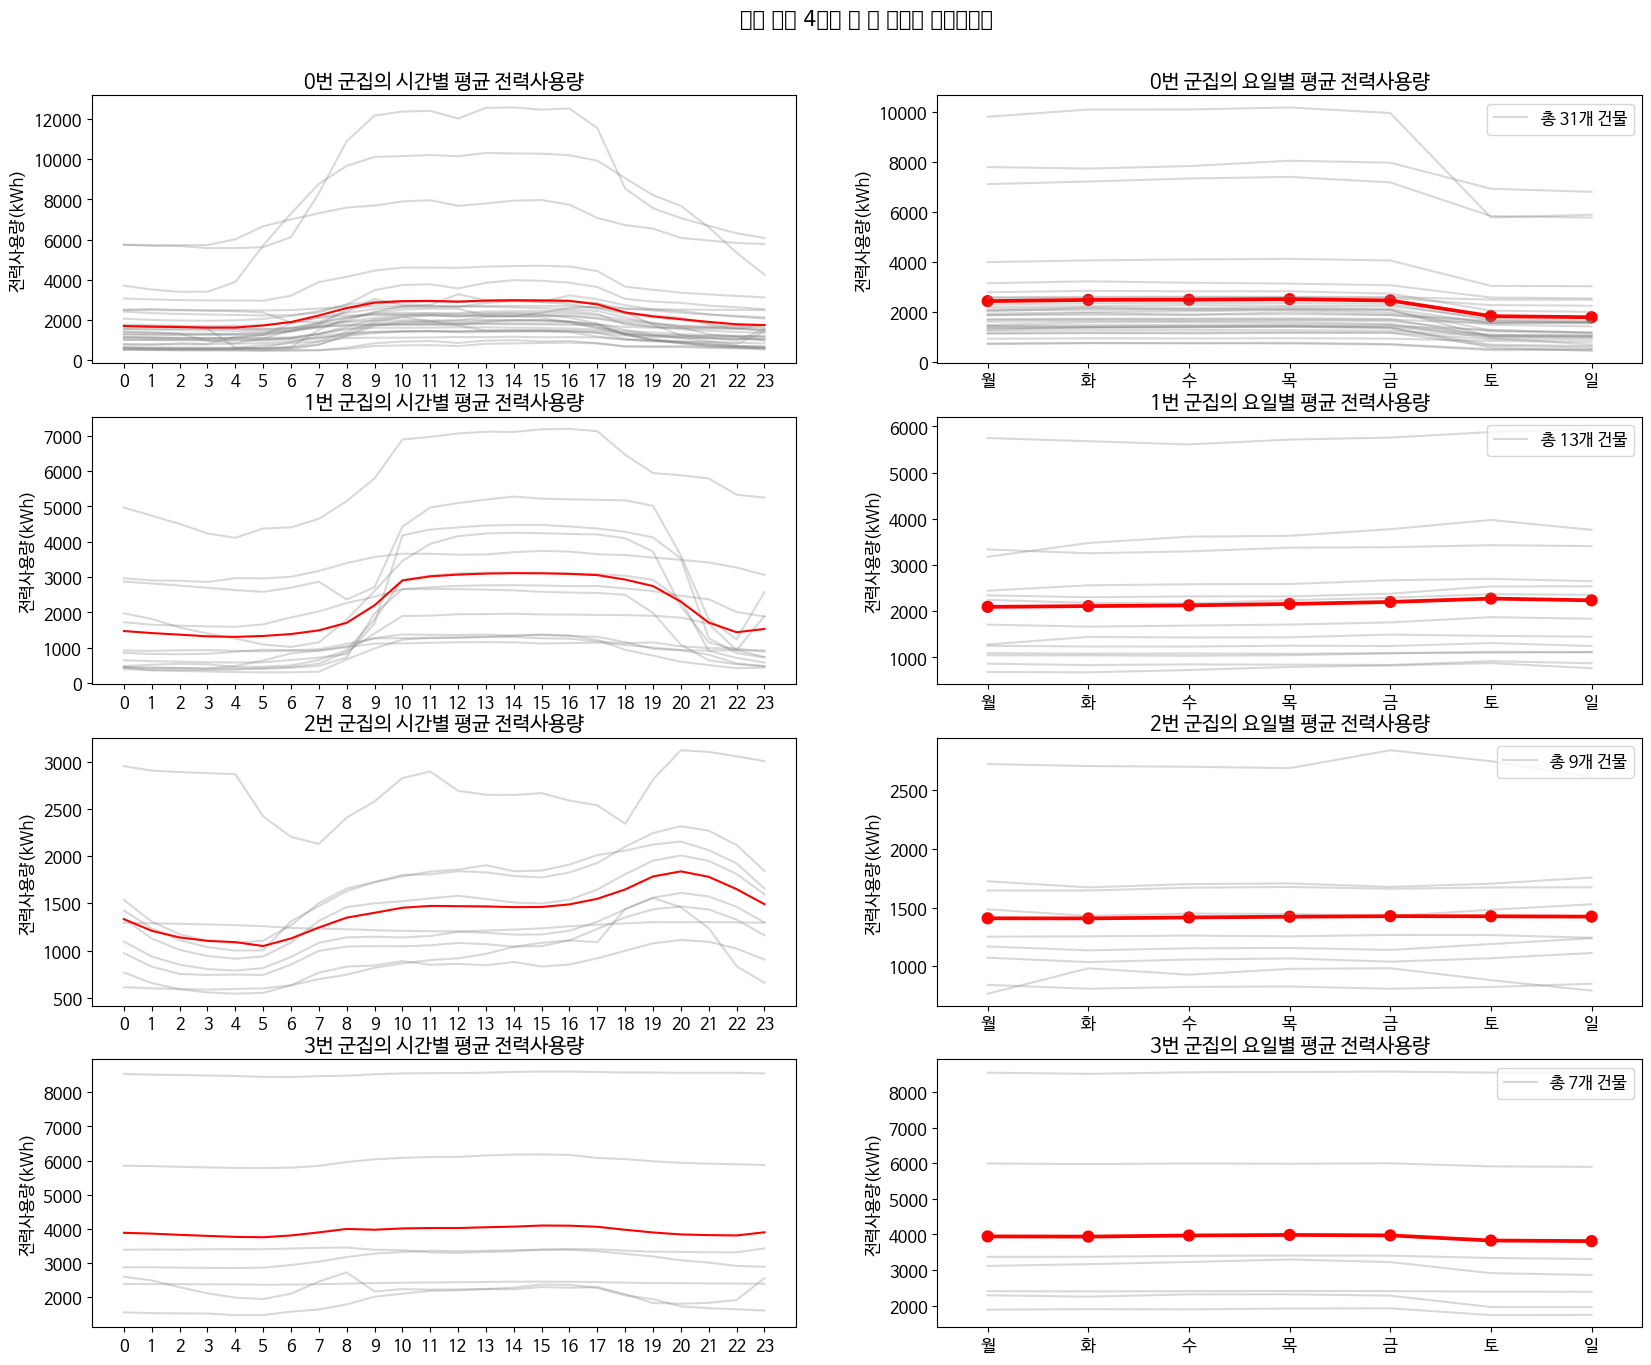

In [101]:
visualize_by_cluster(energy_ts, n_cluster=4, algorithm='kmeans')

- 서브플롯의 세로 순서대로 각각 다른 군집입니다.
- 서브플롯의 왼쪽 그래프는 시간별 전력 사용 추이를 나타냅니다.
- 서브플롯의 오른쪽 그래프는 요일별 전력 사용 추이를 나타냅니다.
- 각각 군집의 평균값이 빨간색으로 강조되어 있습니다.

#### (7) 군집화 결과 분석 

- 0번 군집: 
>- 시간별 추이에서 오전 7시에서 오후 7시까지 사용량이 집중 
>- 요일별 추이에서 평일에 사용량이 집중 

- 1번 군집: 
>- 오전 8시에서 오후 9시까지 사용량이 집중 
>- 요일별 사용량이 거의 균일, 토요일의 사용량이 미세하게 높음 

- 2번 군집: 
>- 오전2시에서 5시까지 사용량이 저조하며 이후 꾸준히 증가하다가 오후 8시 무렵을 기점으로 감소 
>- 요일별 사용량이 거의 균일 

- 3번 군집: 
>- 시간별 사용량이 균일 
>- 요일별 사용량도 거의 균일하나 주말이 약간 적음 

<br> 

*가능성: 각 군집의 사용량 추이로 건물의 용도를 추측해 볼 수 있습니다* 

- 예컨대, '오전 7시에서 오후 7시 사이 + 평일'이라는 조건에 사용량이 집중되어있는 0번 군집은 오피스, 또는 학교 등으로 추측할 수 있어 보입니다. 

- 3번 군집의 경우 시간별로 균일한 사용량 추이를 보이며, 주말에 아주 약간의 감소가 있습니다. 모든 시간대에 일정한 전력을 필요로하는 설비이며, 어느 정도의 관리 인원이 있다고 상상할 수 있습니다. 

- 이 가능성을 인사이트로 발전시키기 위해서는 신뢰할 수 있는 추가적인 데이터 수집이 필요할 것 같습니다.